# Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text, stop_words
from sklearn.cluster import KMeans
import time
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import preprocessing


#####################################################
#### Define Custom stop words for CountVectorizer ###
#####################################################
stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

#############################
#### Problem #1 Execution ###
#############################

# Problem Setup/Definition:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Only take a specific selection (8) of the 20 available categories
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

# Load a training & test data sets consisting of those 8 categories
full_dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = None)
print("\n\n" + '-'*40 + "\n\n")


#############################################
#### Define Class data set arrys (0 or 1) ###
#############################################
# Categorize the 8 news categories into two (binary) Classes 
# 0 = computer technology
# 1 = recreational activity
full_data_class = [] 

# Categories are mapped 0-7, (0-3) = Comp, (4-7) = Recreation
print(full_dataset.target_names)
print(full_dataset.target)

for category in full_dataset.target:
    if category < 4:
        full_data_class.append(0)
    else:
        full_data_class.append(1)
        
        
# Sanity Checks, values should all be either 1 or 0
print("First 10 articles Classification (Train): \n" + str(full_data_class[0:10]))
# This will be used for the classification categories only!!!!
# Each data point refers to the classification of a single article in dataset



C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)




----------------------------------------


['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
[2 1 2 ... 2 3 4]
First 10 articles Classification (Train): 
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1]


In [3]:

# Define the CountVectorizer = document-term matrix
full_count_vectorizer = CountVectorizer(min_df=3, stop_words=combined_stopwords)
full_doc_term_matrix = full_count_vectorizer.fit_transform(full_dataset.data)

print(full_count_vectorizer)
print("\n\n" + '-'*40 + "\n\n")

# Start TD-DIF Transform process
tfidf_transformer = TfidfTransformer()
full_tfidf = tfidf_transformer.fit_transform(full_doc_term_matrix)

print("Number of articles within the FULL Dataset: " + str(len(full_dataset.filenames)))
print("Number of Features (unique words) in FULL dataset (After Processing): "+ str(len(full_count_vectorizer.get_feature_names())))
print("Shape of FULL document-count-matrix: " + str(full_doc_term_matrix.shape))
print("Shape of FULL TF-IDF Matrix: " + str(full_tfidf.shape))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
                            '+', ',', '-', '.', '/', ':', ';', '<', '=', '>',
                            '?', '@', '[', '\\', ']', '^', '_', '`', 'a',
                            'about', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


----------------------------------------


Number of articles within the FULL Dataset: 7882
Number of Features (unique words) in FULL dataset (After Processing): 27743
Shape of FULL document-count-matrix: (7882, 27743)
Shape of FULL TF-IDF Matrix: (7882, 27743)


In [4]:
## question 2

#Kmeans random_state=0, max_iter >= 1000, n_init >= 30
from sklearn.cluster import KMeans
from sklearn import metrics
import time

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
print("Clustering sparse data with %s" % km)
t0 = time.time()
km.fit(full_tfidf)
print("done in %0.3fs" % (time.time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(full_data_class, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(full_data_class, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(full_data_class, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(full_data_class, km.labels_))
print("Adjusted Mutual Information Score: %.3f" % metrics.adjusted_mutual_info_score(full_data_class, km.labels_))


cont_matrix = metrics.cluster.contingency_matrix(full_data_class, km.labels_)



print(cont_matrix)



Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 414.583s

Homogeneity: 0.252
Completeness: 0.334
V-measure: 0.287
Adjusted Rand-Index: 0.179
Adjusted Mutual Information Score: 0.287
[[3899    4]
 [2269 1710]]


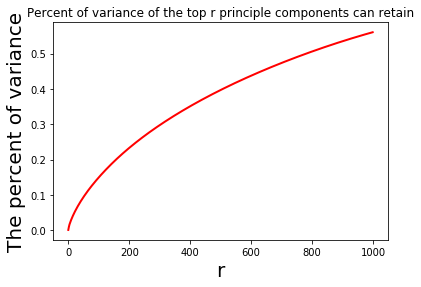

In [16]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000)
SVD_full_tfidf = svd.fit_transform(full_tfidf)
    
variances = []
sum = 0
for i in svd.explained_variance_ratio_:
    sum += i
    variances.append(sum)
plt.figure()
plt.plot(variances, color='red', lw=2)
plt.xlabel('r', fontsize=20)
plt.ylabel('The percent of variance', fontsize=10)
plt.title('Percent of variance of the top r principle components can retain')
plt.show()

n_components=1
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.149s

n_components=2
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.245s

n_components=3
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.320s

n_components=5
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.239s



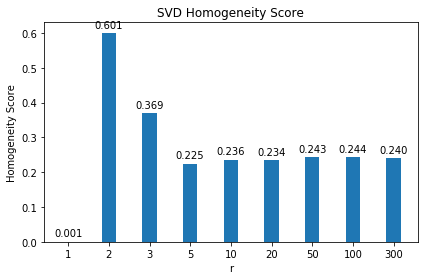

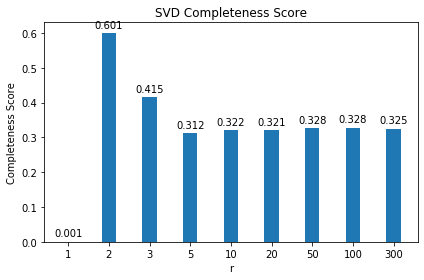

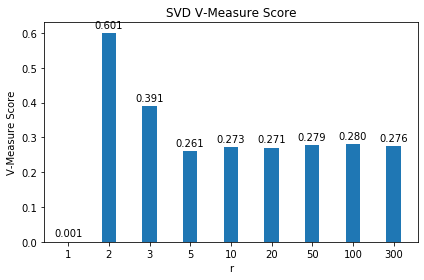

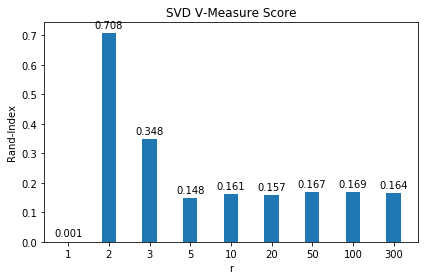

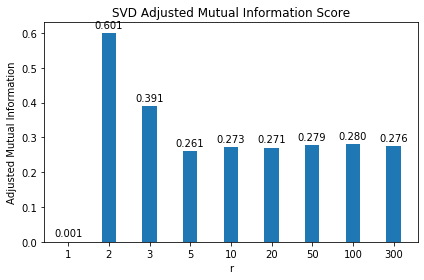

In [6]:
#question 5

#km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
SVD_homogeneity = []
SVD_completeness = []
SVD_vmeasure = []
SVD_adjusted_rand = []
SVD_adjusted_mutual = []

r_set = [1, 2, 3, 5, 10, 20, 50, 100, 300]
for r in r_set:
    print("n_components=" + str(r))
    svd = TruncatedSVD(n_components=r)
    SVD_full_tfidf = svd.fit_transform(full_tfidf)
    print("Clustering sparse data with %s" % km)
    t0 = time.time()
    km.fit(SVD_full_tfidf)
    print("done in %0.3fs" % (time.time() - t0))
    print()

    SVD_homogeneity.append(metrics.homogeneity_score(full_data_class, km.labels_))
    SVD_completeness.append(metrics.completeness_score(full_data_class, km.labels_))
    SVD_vmeasure.append(metrics.v_measure_score(full_data_class, km.labels_))
    SVD_adjusted_rand.append(metrics.adjusted_rand_score(full_data_class, km.labels_))
    SVD_adjusted_mutual.append(metrics.adjusted_mutual_info_score(full_data_class, km.labels_))

#plot each one

        
def plot_r_plot_score(y_values_vector, r_set_values, plot_y_label, plot_title):
    
    labels = r_set_values
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y_values_vector, width)
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(plot_y_label)
    ax.set_title(plot_title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('r')
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    autolabel(rects1)
    fig.tight_layout()

    plt.show()
    
plot_r_plot_score(SVD_homogeneity, r_set, 'Homogeneity Score', 'SVD Homogeneity Score')
plot_r_plot_score(SVD_completeness, r_set, 'Completeness Score', 'SVD Completeness Score')
plot_r_plot_score(SVD_vmeasure, r_set, 'V-Measure Score', 'SVD V-Measure Score')
plot_r_plot_score(SVD_adjusted_rand, r_set, 'Rand-Index', 'SVD V-Measure Score')
plot_r_plot_score(SVD_adjusted_mutual, r_set, 'Adjusted Mutual Information', 'SVD Adjusted Mutual Information Score')

    ## do SVD, NMF and run k means clustering on each. record the values. separating SVD and NMF sections due to compute time

n_components=1
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.158s

n_components=2
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.147s

n_components=3
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.129s

n_components=5
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.216s



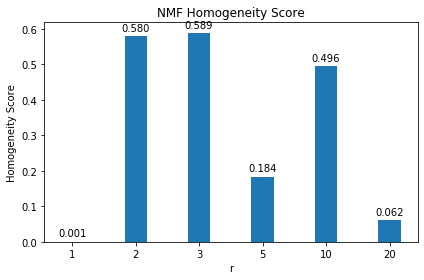

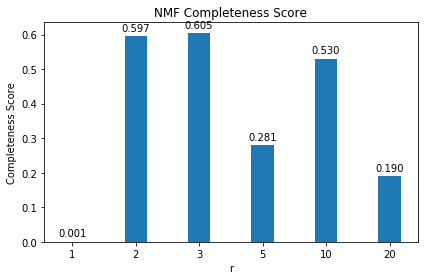

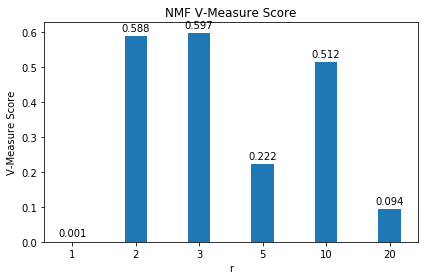

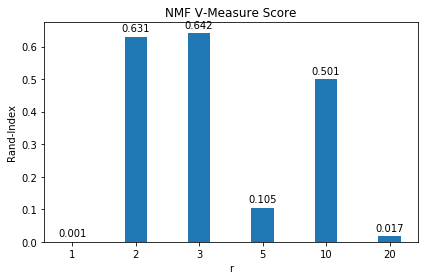

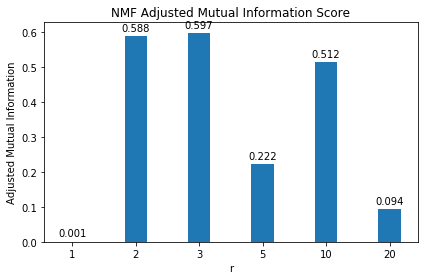

In [8]:
from sklearn.decomposition import NMF
NMF_homogeneity = []
NMF_completeness = []
NMF_vmeasure = []
NMF_adjusted_rand = []
NMF_adjusted_mutual = []
r_set = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print("n_components=" + str(r))
    #NMF reduction
    nmf_settings = NMF(n_components=r, init='random', random_state=0)
    reduced_full_nmf_matrix = nmf_settings.fit_transform(full_tfidf)
    nmf_settings_components = nmf_settings.components_
    #kmeans
    print("Clustering sparse data with %s" % km)
    t0 = time.time()
    km.fit(reduced_full_nmf_matrix)
    print("done in %0.3fs" % (time.time() - t0))
    print()

    NMF_homogeneity.append(metrics.homogeneity_score(full_data_class, km.labels_))
    NMF_completeness.append(metrics.completeness_score(full_data_class, km.labels_))
    NMF_vmeasure.append(metrics.v_measure_score(full_data_class, km.labels_))
    NMF_adjusted_rand.append(metrics.adjusted_rand_score(full_data_class, km.labels_))
    NMF_adjusted_mutual.append(metrics.adjusted_mutual_info_score(full_data_class, km.labels_))
    
plot_r_plot_score(NMF_homogeneity, r_set, 'Homogeneity Score', 'NMF Homogeneity Score')
plot_r_plot_score(NMF_completeness, r_set, 'Completeness Score', 'NMF Completeness Score')
plot_r_plot_score(NMF_vmeasure, r_set, 'V-Measure Score', 'NMF V-Measure Score')
plot_r_plot_score(NMF_adjusted_rand, r_set, 'Rand-Index', 'NMF V-Measure Score')
plot_r_plot_score(NMF_adjusted_mutual, r_set, 'Adjusted Mutual Information', 'NMF Adjusted Mutual Information Score')

In [62]:


#import pickle
#with open('clustering.pickle', ‘wb’) as f:
    #pickle.dump([your_content], f)

    
    
#load example
#with open('train.pickle', 'rb') as f:
    #X_train, y_train = pickle.load(f)



SyntaxError: invalid character in identifier (<ipython-input-62-791595708986>, line 2)

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.236s


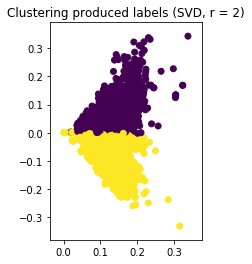

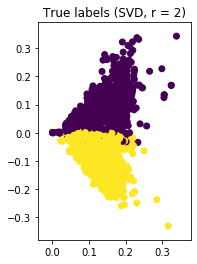

SVD, r = 100 Scores
Homogeneity: 0.604
Completeness: 0.605
V-measure: 0.604
Adjusted Rand-Index: 0.712
Adjusted Mutual Information Score: 0.604
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.113s


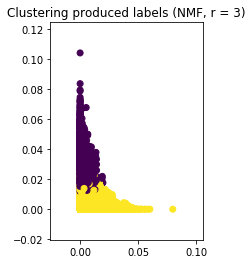

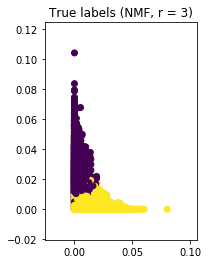

NMF, r = 2 Scores
Homogeneity: 0.589
Completeness: 0.605
V-measure: 0.597
Adjusted Rand-Index: 0.642
Adjusted Mutual Information Score: 0.597


In [10]:
#select r = 2 for SVD, r = 3 for NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF


def plot_kmeans_clusters(kmeans_data, pred_labels, true_labels, title):
    plt.figure()
    ax = plt.subplot(1, 2, 1)
    ax.set_title("Clustering produced labels ({})".format(title))
    ax.scatter(x=kmeans_data[:, 0], y=kmeans_data[:, 1], c=pred_labels)
    plt.show()
    plt.figure()
    ax = plt.subplot(1, 2, 2)
    ax.set_title("True labels ({})".format(title))
    ax.scatter(x=kmeans_data[:, 0], y=kmeans_data[:, 1], c=true_labels)
    plt.show()
    
svd = TruncatedSVD(n_components=2, random_state=0)
optimal_SVD_full_tfidf = svd.fit_transform(full_tfidf)
km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
print("Clustering sparse data with %s" % km)
t0 = time.time()
km.fit(optimal_SVD_full_tfidf)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_SVD_full_tfidf, km.labels_, full_data_class, 'SVD, r = 2')

print("SVD, r = 100 Scores")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(full_data_class, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(full_data_class, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(full_data_class, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(full_data_class, km.labels_))
print("Adjusted Mutual Information Score: %.3f" % metrics.adjusted_mutual_info_score(full_data_class, km.labels_))


nmf_settings = NMF(n_components=3, init='random', random_state=0)
optimal_full_nmf_matrix = nmf_settings.fit_transform(full_tfidf)
nmf_settings_components = nmf_settings.components_
km_nmf = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
print("Clustering sparse data with %s" % km_nmf)
t0 = time.time()
km_nmf.fit(optimal_full_nmf_matrix)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_full_nmf_matrix, km_nmf.labels_, full_data_class, 'NMF, r = 3')

print("NMF, r = 2 Scores")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(full_data_class, km_nmf.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(full_data_class, km_nmf.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(full_data_class, km_nmf.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(full_data_class, km_nmf.labels_))
print("Adjusted Mutual Information Score: %.3f" % metrics.adjusted_mutual_info_score(full_data_class, km_nmf.labels_))



Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.207s


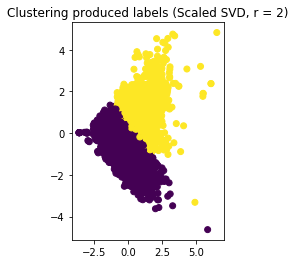

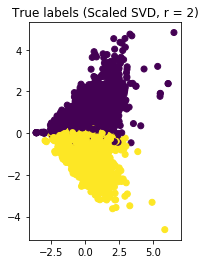

Scaled SVD, r = 2 Scores
Homogeneity: 0.227032
Completeness: 0.258726
V-measure: 0.241845
Adjusted Rand-Index: 0.239737
Adjusted Mutual Information Score: 0.241771


In [13]:
from sklearn import preprocessing


svd = TruncatedSVD(n_components=2, random_state=0)
optimal_SVD_full_tfidf = svd.fit_transform(full_tfidf)
optimal_scaled_SVD = preprocessing.scale(optimal_SVD_full_tfidf)
km_scale_svd = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
print("Clustering sparse data with %s" % km)
t0 = time.time()
km_scale_svd.fit(optimal_scaled_SVD)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_scaled_SVD, km_scale_svd.labels_, full_data_class, 'Scaled SVD, r = 2')

print("Scaled SVD, r = 2 Scores")
print("Homogeneity: %0.6f" % metrics.homogeneity_score(full_data_class, km_scale_svd.labels_))
print("Completeness: %0.6f" % metrics.completeness_score(full_data_class, km_scale_svd.labels_))
print("V-measure: %0.6f" % metrics.v_measure_score(full_data_class, km_scale_svd.labels_))
print("Adjusted Rand-Index: %.6f" % metrics.adjusted_rand_score(full_data_class, km_scale_svd.labels_))
print("Adjusted Mutual Information Score: %.6f" % metrics.adjusted_mutual_info_score(full_data_class, km_scale_svd.labels_))


##svd non-scaling already completed

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.157s


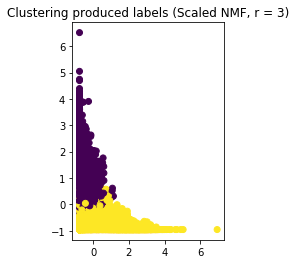

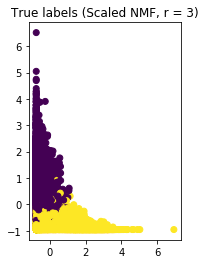

NMF with Scaling, r = 3 Scores
Homogeneity: 0.655354
Completeness: 0.663637
V-measure: 0.659470
Adjusted Rand-Index: 0.727716
Adjusted Mutual Information Score: 0.659438
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.231s


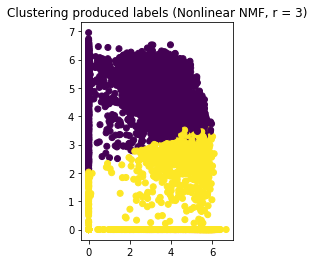

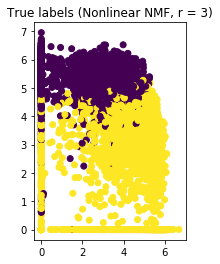

NMF with Nonlinear Transform, r = 3 Scores
Homogeneity: 0.374500
Completeness: 0.422535
V-measure: 0.397071
Adjusted Rand-Index: 0.347365
Adjusted Mutual Information Score: 0.397012
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.110s


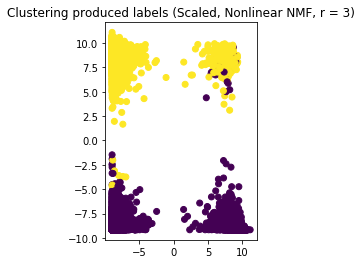

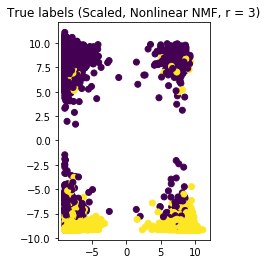

NMF with scaling then Nonlinear Transformation, r = 2 Scores
Homogeneity: 0.604690
Completeness: 0.618600
V-measure: 0.611566
Adjusted Rand-Index: 0.663391
Adjusted Mutual Information Score: 0.611530
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
done in 0.266s


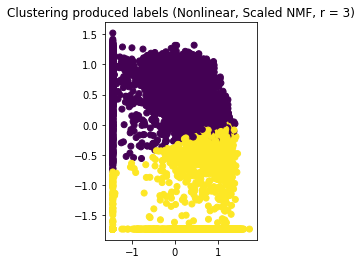

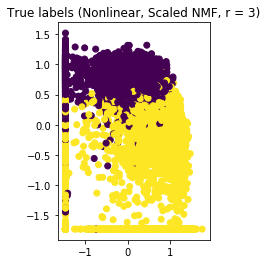

NMF with Nonlinear Transform then scaling, r = 3 Scores
Homogeneity: 0.390854
Completeness: 0.435762
V-measure: 0.412088
Adjusted Rand-Index: 0.369239
Adjusted Mutual Information Score: 0.412031


In [16]:
from sklearn import preprocessing


def nonlinear_transform(dimension_reduced_data, C=0.0001):
    intermediate = np.log(np.abs(dimension_reduced_data) + C) - np.log(C)
    return np.sign(dimension_reduced_data) * intermediate

#no scaling, no transform already done

#scaling, no transform
nmf_settings = NMF(n_components=3, init='random', random_state=0)
optimal_full_nmf_matrix = nmf_settings.fit_transform(full_tfidf)
optimal_scaled_NMF = preprocessing.scale(optimal_full_nmf_matrix)
km_nmf = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
print("Clustering sparse data with %s" % km_nmf)
t0 = time.time()
km_nmf.fit(optimal_scaled_NMF)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_scaled_NMF, km_nmf.labels_, full_data_class, 'Scaled NMF, r = 3')

print("NMF with Scaling, r = 3 Scores")
print("Homogeneity: %0.6f" % metrics.homogeneity_score(full_data_class, km_nmf.labels_))
print("Completeness: %0.6f" % metrics.completeness_score(full_data_class, km_nmf.labels_))
print("V-measure: %0.6f" % metrics.v_measure_score(full_data_class, km_nmf.labels_))
print("Adjusted Rand-Index: %.6f" % metrics.adjusted_rand_score(full_data_class, km_nmf.labels_))
print("Adjusted Mutual Information Score: %.6f" % metrics.adjusted_mutual_info_score(full_data_class, km_nmf.labels_))


#transform, no scaling
optimal_transf_NMF = nonlinear_transform(optimal_full_nmf_matrix, C=0.0001)

print("Clustering sparse data with %s" % km_nmf)
t0 = time.time()
km_nmf.fit(optimal_transf_NMF)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_transf_NMF, km_nmf.labels_, full_data_class, 'Nonlinear NMF, r = 3')

print("NMF with Nonlinear Transform, r = 3 Scores")
print("Homogeneity: %0.6f" % metrics.homogeneity_score(full_data_class, km_nmf.labels_))
print("Completeness: %0.6f" % metrics.completeness_score(full_data_class, km_nmf.labels_))
print("V-measure: %0.6f" % metrics.v_measure_score(full_data_class, km_nmf.labels_))
print("Adjusted Rand-Index: %.6f" % metrics.adjusted_rand_score(full_data_class, km_nmf.labels_))
print("Adjusted Mutual Information Score: %.6f" % metrics.adjusted_mutual_info_score(full_data_class, km_nmf.labels_))

#scaling, then transform

optimal_scale_transf_NMF = nonlinear_transform(optimal_scaled_NMF, C=0.0001)

print("Clustering sparse data with %s" % km_nmf)
t0 = time.time()
km_nmf.fit(optimal_scale_transf_NMF)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_scale_transf_NMF, km_nmf.labels_, full_data_class, 'Scaled, Nonlinear NMF, r = 3')

print("NMF with scaling then Nonlinear Transformation, r = 2 Scores")
print("Homogeneity: %0.6f" % metrics.homogeneity_score(full_data_class, km_nmf.labels_))
print("Completeness: %0.6f" % metrics.completeness_score(full_data_class, km_nmf.labels_))
print("V-measure: %0.6f" % metrics.v_measure_score(full_data_class, km_nmf.labels_))
print("Adjusted Rand-Index: %.6f" % metrics.adjusted_rand_score(full_data_class, km_nmf.labels_))
print("Adjusted Mutual Information Score: %.6f" % metrics.adjusted_mutual_info_score(full_data_class, km_nmf.labels_))



#check transformation first then scaling?

optimal_transf_sc_NMF = preprocessing.scale(optimal_transf_NMF)

print("Clustering sparse data with %s" % km_nmf)
t0 = time.time()
km_nmf.fit(optimal_transf_sc_NMF)
print("done in %0.3fs" % (time.time() - t0))

plot_kmeans_clusters(optimal_transf_sc_NMF, km_nmf.labels_, full_data_class, 'Nonlinear, Scaled NMF, r = 3')

print("NMF with Nonlinear Transform then scaling, r = 3 Scores")
print("Homogeneity: %0.6f" % metrics.homogeneity_score(full_data_class, km_nmf.labels_))
print("Completeness: %0.6f" % metrics.completeness_score(full_data_class, km_nmf.labels_))
print("V-measure: %0.6f" % metrics.v_measure_score(full_data_class, km_nmf.labels_))
print("Adjusted Rand-Index: %.6f" % metrics.adjusted_rand_score(full_data_class, km_nmf.labels_))
print("Adjusted Mutual Information Score: %.6f" % metrics.adjusted_mutual_info_score(full_data_class, km_nmf.labels_))
